In [63]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [64]:
df = pd.read_csv(os.path.join('..', 'datasets', 'adult.csv'))

In [65]:
df

,age,workclass,fnlwgt,education,education.num,...,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,...,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,...,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,...,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,...,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,...,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,...,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,...,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,...,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,...,0,0,40,United-States,<=50K


In [66]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

### Data Dictionary For Adult Census Income Data
Variable | Type of Variable | Description 
---|---|---
`age` | Continuous | Age of Participant 
   `workclass` | Categorical | Defined workclass of individual / (Private, Self-Employed, Federal - Gov, Local - Gov, State - gov, Without) 
   `fnlwgt` | Continuous | Weights assigned to any specified socio - economic characterisitcs of the population.. People with similar demographics have similar weights 
   `education Level` | Categorical |  (Bachelors, Some - College, 11th.. etc)
   `education-num` | Continuous |  Numerical value assigned to education level... 16 being the highest level of education to 1 being the lowest 
   `martial-status` | Categorical | (Married, Divorced, Never - married, Seperated, Widowed, Married - Spouse - absent)
   `occupation` | Categorical | (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
   `relationship` | Categorical | (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
   `race` | Categorical | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
   `sex` | Categorical | (Female, male)
   `capital-gain` | Continuous | capital gain in past year
   `capital-loss` | Continuous | capital loss in past year 
   `hours-per-week` | Continuous | how many hours worked a week 
   `native-country` | Categorical |  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
    





In [112]:
#Rename columns to get rid of '.' and make cleaner 
df.rename(columns = {'education.num': 'education_num',
                              'marital.status': 'marital_status',
                              'capital.gain': 'capital_gain',
                              'hours.per.week': 'hours_week',
                                'capital.loss' : 'capital_loss',
                                'native.country': 'native_country'}, inplace = True)


In [68]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [69]:
df['education_num'].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1])

In [70]:
df.isnull().sum().sum()
#check for NaN

0

In [71]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [72]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [73]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

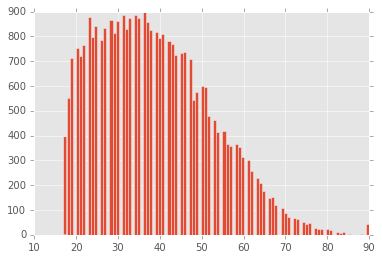

In [74]:
df['age'].hist(bins = 100)
#Distrubtion of Age 

In [75]:
df.age.mean()
#Average Age

38.58164675532078

In [76]:
pd.crosstab(df.occupation,df.income)

income,<=50K,>50K
occupation,,
?,1652,191
Adm-clerical,3263,507
Armed-Forces,8,1
Craft-repair,3170,929
Exec-managerial,2098,1968
...,...,...
Prof-specialty,2281,1859
Protective-serv,438,211
Sales,2667,983


In [77]:
pd.crosstab(df.education,df.income).sort_index(axis = 0, ascending = False)


income,<=50K,>50K
education,,
Some-college,5904,1387
Prof-school,153,423
Preschool,51,0
Masters,764,959
HS-grad,8826,1675
...,...,...
5th-6th,317,16
1st-4th,162,6
12th,400,33


In [78]:
#Turn Income Into binary data
df['income'] = df['income'].replace({'<=50K': 0, '>50K':1}, regex=True)


In [79]:
df.income.mean()

0.2408095574460244

In [80]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12101a4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f834350>]], dtype=object)

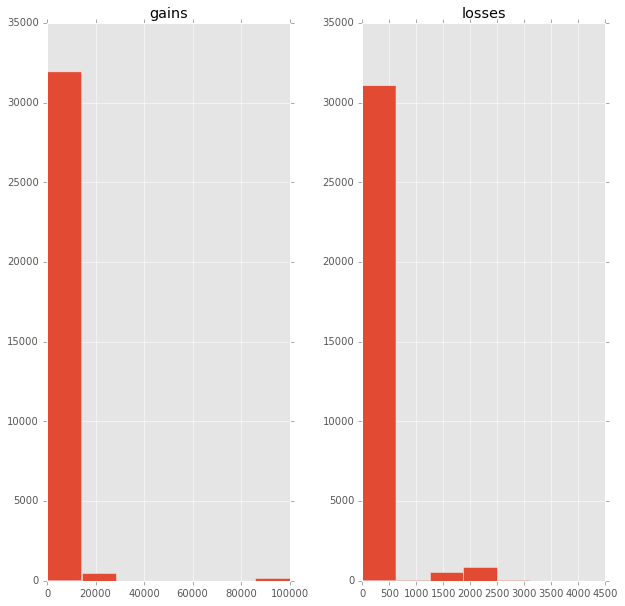

In [81]:
capitals = pd.DataFrame({"gains":df['capital_gain'], "losses":df['capital_loss']})
capitals.hist(bins = 7, figsize = (10,10))

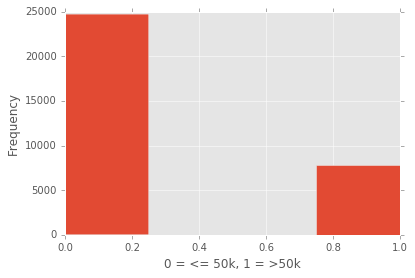

In [103]:
Income_hist = df.income.plot(kind = 'hist', bins = 4)
Income_hist.set_xlabel("0 = <= 50k, 1 = >50k")

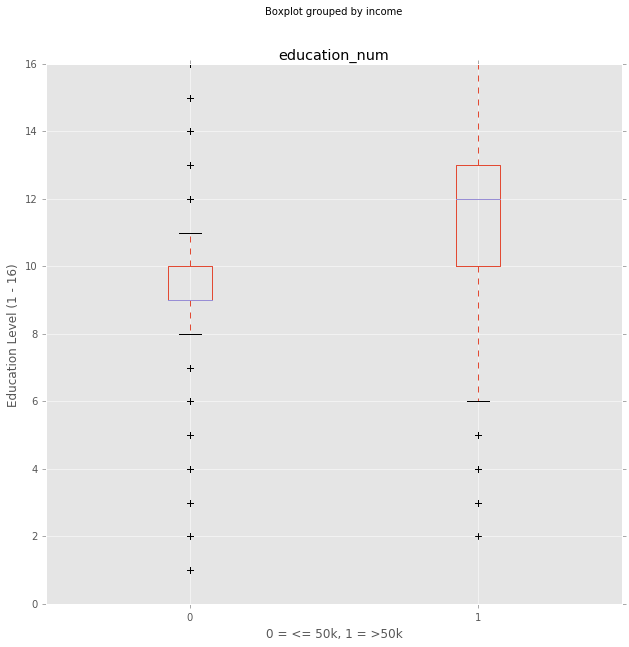

In [106]:
education_box = df.boxplot('education_num', 'income', figsize = (10,10), )
education_box.set_xlabel('0 = <= 50k, 1 = >50k')
education_box.set_ylabel('Education Level (1 - 16)')

In [94]:
pd.crosstab(df.workclass,df.income)

income,0,1
workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,945,353
Without-pay,14,0


In [111]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [113]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000
